# Deciding what to try next
- For example, we've implemented regularized lienar regression to predict housing prices.
- If we train the model and find that it makes unacceptably large errors in it's predictions, what do we try next?
- When we're building a machine learning algorithm, there are usually a lot of differn things we could try.
    - We could decide to get more training examples.
    - Maybe we have too many features, so we could try a smaller set of features.
    - We want to get additional features.
    - Try adding polynomial features.
    - Try decreasing or increasing lambda.
   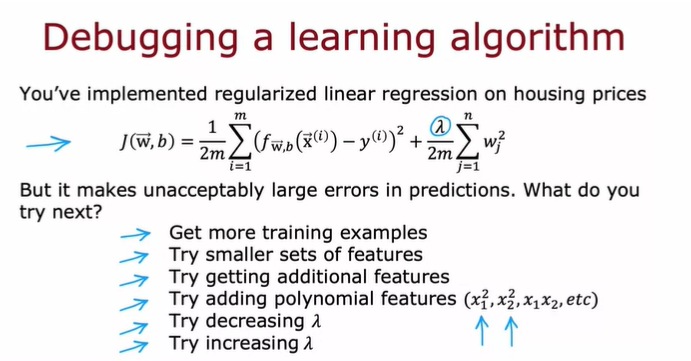
- 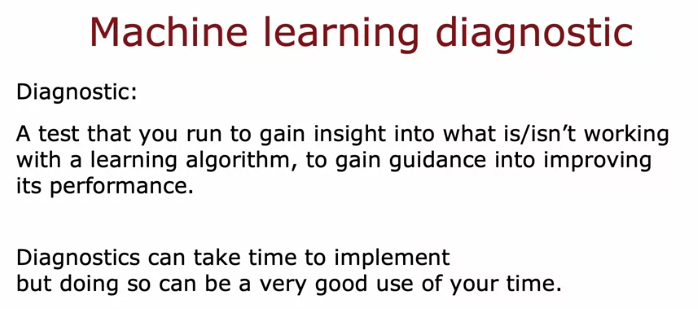  

# Evaluating a model
- 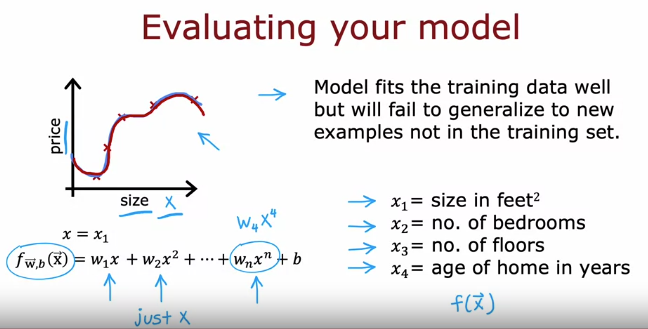
- I order to tell if our model is doin      g well, especially for applications where we have more than one or two features, which makes it difficult to plot f(x). We need some more systematic way to evaluate how well our model is doing.
- If we have a training set, rather than taking all our data to train the parameters w and p of the model, we can instead split the training set into 2 subsets. The first part to call that the training set and the second part of the data a test set
    - 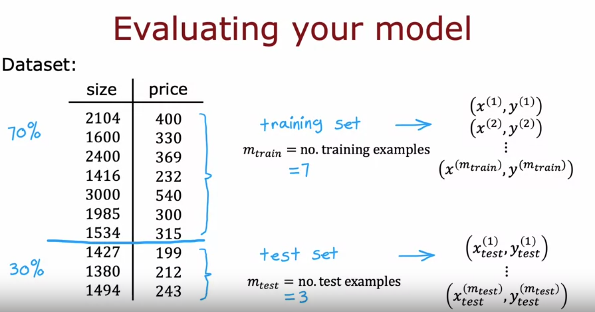
- 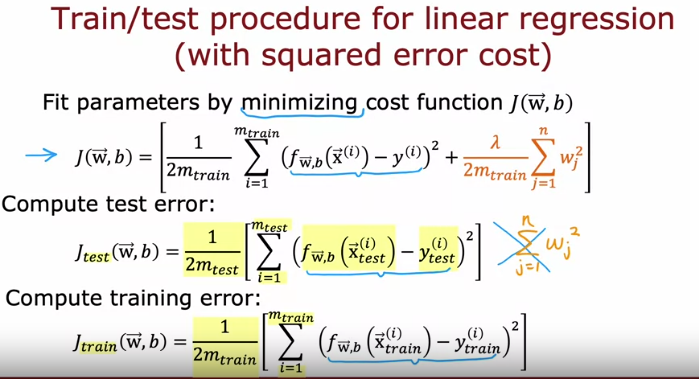
- 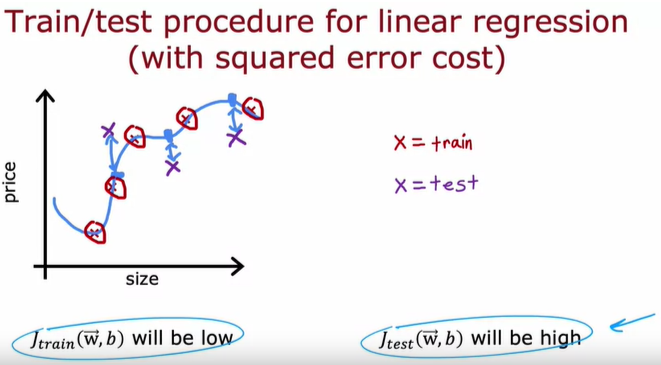
- 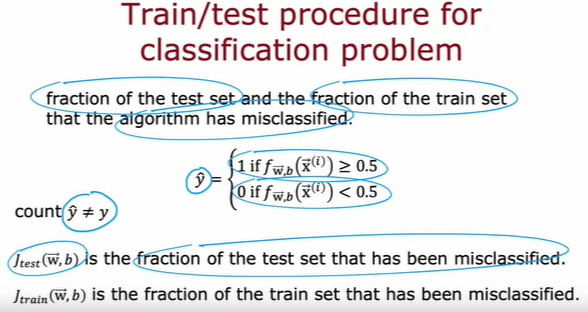
- Taking a dataset and splitting it into a training set and a separate test set gives us a way to systematically evaluate how well our learning algorithm is doing. By computing both J tests and J train, we can now measure how was doing on the test set and on the training set.

# Model Selection and Training/Cross validation/test sets
- Once the model's parameters w and b have been fit to the training set. The training error may not be a good indicator of how well the algorithm will do or how well it will generalize to new examples that were not in the training set, and in particular the training error will be pretty much zero.
- The J test the performance on examples, is not trained on, that will be a better indicator of how well the model will likely do on new data.
- 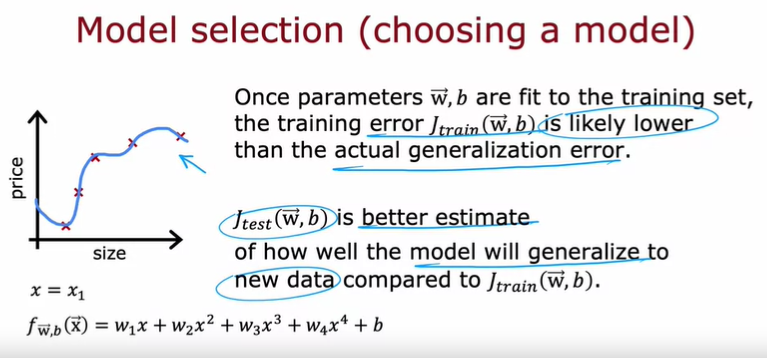
- One procedure we could try, look at all of the J tests, and see which one gives us the lowest value.
    - 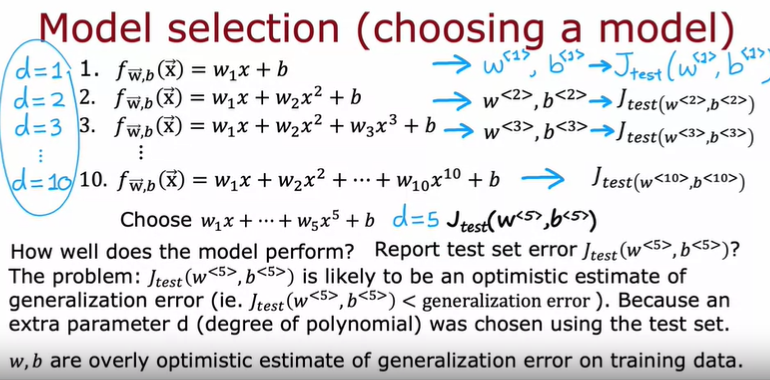
- Instead, if we want to automatically choose a model, such as decide what degree polynomial to use. We modify the training and testing procedure in order to carry out model selection. 
- The way we'll modify the procedure is instead of splitting our data into 3 different subsets, which we're going to split our data into 3 different subsets, which we're going to call the training set, the cross-validation set, and then also the test set. 
    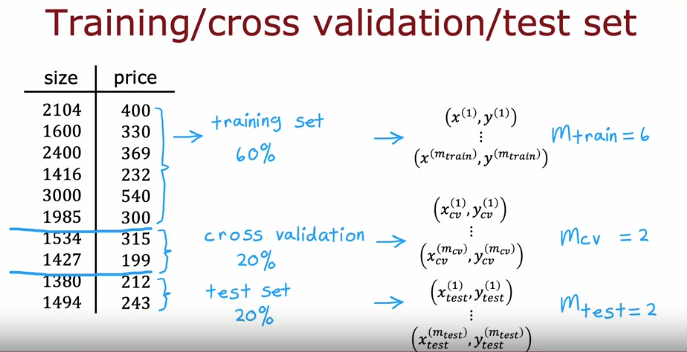
- Cross validation set or validatinon set or development set or dev set
- 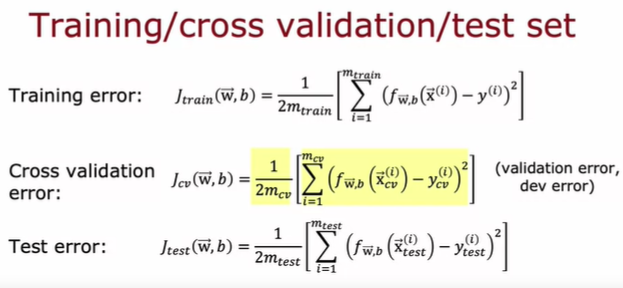
- 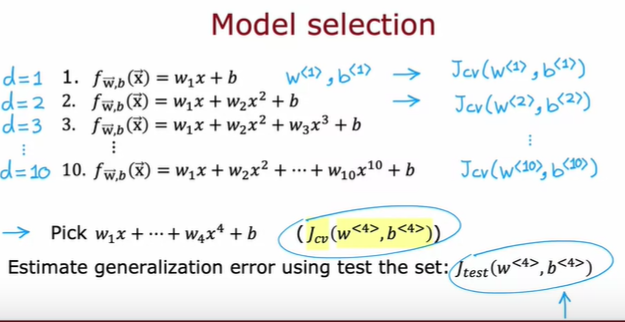
- We pick the model with the lowest cross validation error.
- 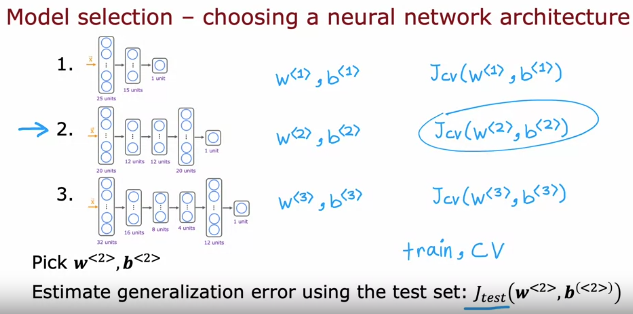
- If we have too make decisions about our model, such as fitting parameters or choosing the model architecture, such as neural network architecture or degree of polynomial if we're fitting a lienar regression, to make all those decisions only using our training set and our cross validation set, and to not look at the test set at all while we're stillin making decisions regarding our learning algorithm. It's only after we've come up with one model as our final model to only then evaluate it on the test set and because we haven't made any decisions using the test set, that ensures that our test set is a fair and not overly optimistic estimate of how well our model will generalize to new data.
- The most poweerful diagnostic that are used for a lot of machine learning applications is one called bias and variance.

# Lab : Model Evaluation and Selection
- Qualifying a learning algorithm's performance and comparing different models are some of the common tasks when applying machine learning to real world applications.
    - Split dataset into training, cross validation and test sets
    - Evaluate regression and classification models
    - Add polynomial features to improve the performance of a linear regression model.
    - Compare several neural network architectures.

In [33]:
# For array computations and loading data
import numpy as np

import matplotlib.pyplot as plt

# For building linear regression modelas and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# For building and training neural networks
import tensorflow as tf

## Regression

In [34]:
# Load the dataset from the text file
data = np.loadtxt('data_w3_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:, 0]
y = data[:, 1]

# Convert 1-D arrays into 2-D
x = np.expand_dims(x, axis=1)
y =np.expand_dims(y, axis=1)

print(f"The shape of the inputs x is : {x.shape}")
print(f"The shape of the targets y is : {y.shape}")

The shape of the inputs x is : (50, 1)
The shape of the targets y is : (50, 1)


In [35]:
x[:, 0]

array([1651.        , 1691.81632653, 1732.63265306, 1773.44897959,
       1814.26530612, 1855.08163265, 1895.89795918, 1936.71428571,
       1977.53061224, 2018.34693878, 2059.16326531, 2099.97959184,
       2140.79591837, 2181.6122449 , 2222.42857143, 2263.24489796,
       2304.06122449, 2344.87755102, 2385.69387755, 2426.51020408,
       2467.32653061, 2508.14285714, 2548.95918367, 2589.7755102 ,
       2630.59183673, 2671.40816327, 2712.2244898 , 2753.04081633,
       2793.85714286, 2834.67346939, 2875.48979592, 2916.30612245,
       2957.12244898, 2997.93877551, 3038.75510204, 3079.57142857,
       3120.3877551 , 3161.20408163, 3202.02040816, 3242.83673469,
       3283.65306122, 3324.46938776, 3365.28571429, 3406.10204082,
       3446.91836735, 3487.73469388, 3528.55102041, 3569.36734694,
       3610.18367347, 3651.        ])

Text(0.5, 1.0, 'Input vs Target')

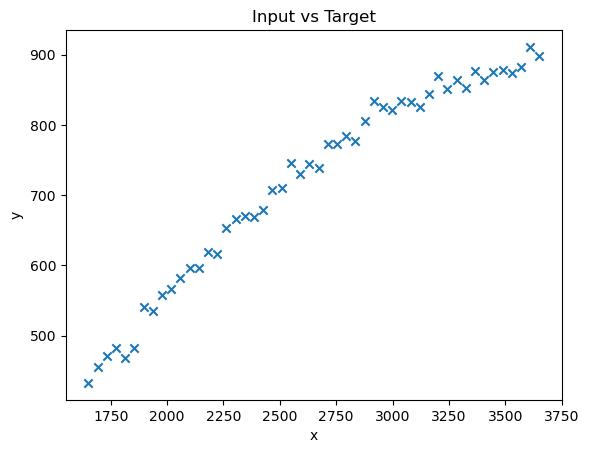

In [36]:
plt.scatter(x, y, marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Input vs Target')

## Split the dataset into training, cross validation and test sets
- It is best to hold out a portion of our data to measure how well our model generalized to new examples. This will let us know if the model has overfit to out training set.
- It is common to split our data into 3 parts:
    1. Trainins set : used to train the model.
    2. Cross validation set (also called validation, development, or dev set) : Used to evaluate the different model configurations we are choosing from. for example, we can use this to make a decision on what polynomial features to add to our dataset.
    3. Test set : Used to give a fair estimate of our chosen model's performance aganist new examples. This should not be used to make decisions while we are still deveoloping the models.  

In [37]:
# Get 60% of the dataset as the training set. Put the reamining 40% in temporary variables : x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split 40% subset above into 2 : Cross validation and for the test set.
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the training set (input) is : {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

The shape of the training set (input) is : (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


Text(0.5, 1.0, 'Input vs Target')

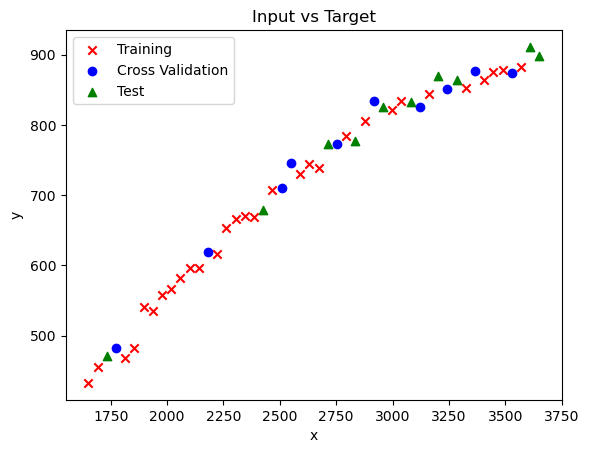

In [38]:
plt.scatter(x_train, y_train, marker='x', c='red', label='Training' )
plt.scatter(x_cv, y_cv, marker='o', c='blue', label='Cross Validation')
plt.scatter(x_test, y_test, marker='^', c='green', label='Test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Input vs Target')

## Fit a linear model
### Feature Scaling :
- It is usually a good idea to perform feature scaling to help our model converge faster. This is especially tur if our input features have widely different ranges of values. If we add polynomial terms our input features will indeed have different ranges. For examples x runs from 1600 to 3600, while x**2 runs from 2.50 million to 12.96 million.
- For feature scaling, we will use the StandardScaler class from scikit-learn, This computes the z-score of our inputs. The z-score is given by the equation
    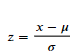

Computed mean of the training set: 2504.06
Computed standard deviation of the training set : 574.85


Text(0.5, 1.0, 'Scaled Input vs Target')

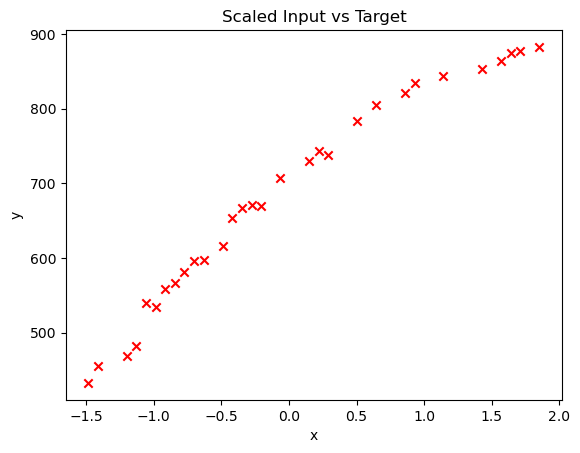

In [39]:
# Intialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviaton of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set : {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plt.scatter(X_train_scaled, y_train, marker='x', c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled Input vs Target')

### Train the model
- We will create and train a regression model. We will use LinearRegression class

In [40]:
# Initilize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Evalute the  Model 
- To evaluate the performane of our model, we will measure the error for the training and cross validation sets. 
- For the training error, the equation for calculating the mean square error (MSE) :
    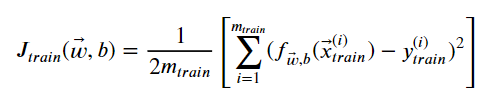
- Scikit-learn also has a built-in mean_sqaured_error() function that we can use. Scikit-learn's implementation only divides by m and not 2*m, where m is the number of examples.
- Since we trained the model on scaled values (i.e using the z-score), we should also feed in the scaled training set instead of its raw values

In [41]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"Training MSE (for-loop implementation): {mse.squeeze()}")

Training MSE (using sklearn function): 406.19374192533155
Training MSE (for-loop implementation): 406.19374192533155


- We can compute the MSE for the cross validatoon set with basically the same equation : 
    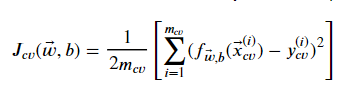
- As with the training set, we will also want to scale the cross validaton set. An important thing is when using the z-score is we have to use the mean and standard deviation of the training set when scaling the cross validation set. This is to ensure that our input features are transformed as expected by the model. 
    - Say that our training set has an input featutes equal to 500 which is scaled down to 0.5 using the z-score.
    - After training, our model is able to accurately map this scaled input x=0.5 to the target output y=300.
    - Now let's say that we deployed this model and one of our users fed it as sample equal to 500.
    - If we get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to 0.5 and our model will most likely make a wrong prediction  (i.e not equal to y =300)
- We will scale the cross validation set by using the same StandardScaler, by using transform() instead of fit_transform().

In [42]:
# Scale the cross validation set using the mean and standard deviation of the traning set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set : {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set : {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE : {mean_squared_error(y_cv, yhat)/2}")

Mean used to scale the CV set : 2504.06
Standard deviation used to scale the CV set : 574.85
Cross validation MSE : 551.7789026952216


## Adding polynomial features
- We may have noticd that the target y rises more sharply at smaller values of x compared to higher ones. A st line might not e the best choice because the target y seems to flatten out as x increases. Now that we have theses values of the training and cross validation MSE from the linear model, we can try adding polynomial features to see if we can get better performance

### Create the additional features
- We will generate the polynomial features from the training set. The code demonstrates how to do this using the PolynomialFeatures class. It will create a new input features which has the squared values of the input x (i.e degree =2)

In [43]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is 'x' and right column is 'x^2'
print(X_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


In [44]:
# Intialize the class
scaler_ploy = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_ploy.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set
print(X_train_mapped_scaled[:5])

[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]


- We can then proceed to train the model. After that, we will measure the model's performance aganist the cross validation set. We should make sure to perform the same transformations as we did in the training set. We will add the same number of polynomial features then scale the range of values

In [45]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train)

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE : {mean_squared_error(y_train, yhat)/2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_ploy.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE : {mean_squared_error(y_cv, yhat)/2}")

Training MSE : 49.111609334025154
Cross validation MSE : 87.6984121111191


- We'll notice that the MSEs are significantly better for bith the training and cross validation set when we added the 2nd order polynomial. We want to introduce more polynomial terms and see which one gives the best performance.
    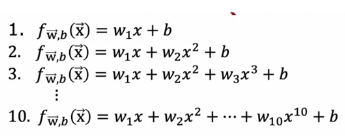

Text(0.5, 1.0, 'Input vs Target')

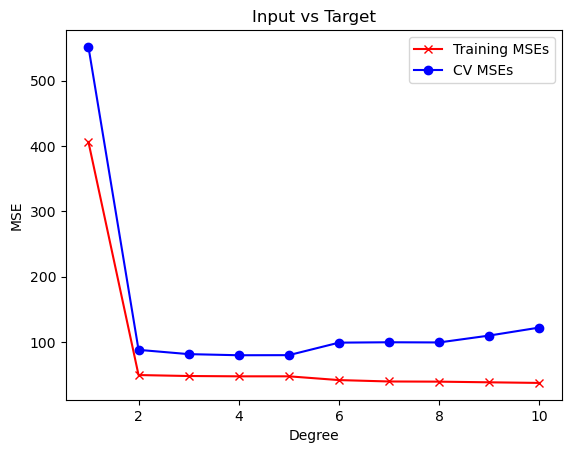

In [46]:
# Initialize lists to save the errors, models, and features
train_mses = []
cv_mses= []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
    
# plot the results
degrees = range(1, 11)
plt.plot(degrees, train_mses, marker='x', c='red', label='Training MSEs' )
plt.plot(degrees, cv_mses, marker='o', c='blue', label='CV MSEs')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('Input vs Target')


## Choosing the best model
- When selecting a model, we want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from our training set without overfitting. We will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. . However, the cross validation error is getting worse after 5 as we add more polynomial features.
- So we can decide to use the model with the lowest cv_mse as the one best suited for our application

In [47]:
# Get the model with the loqest CV MSE (add 1 because list indices start at 0)
degree = np.argmin(cv_mses)+1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


- We can then publish the generalization error by computing the test set's MSE. As usual we should transform the data the same way we did with the training and cross valdiation set.

In [48]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# compute the test MSE 
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2

print(f"Training MSE : {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE : 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


## Neural Network
- The same model selection process can also be used when choosing b/w different neural network architecture. 
    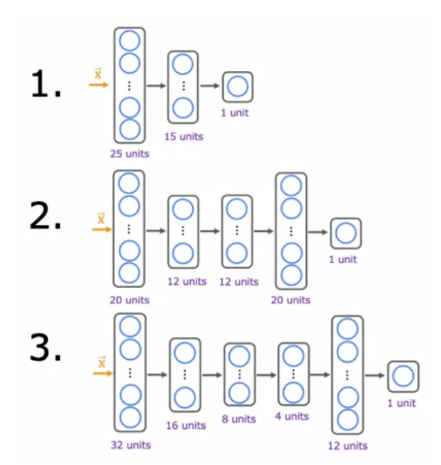

In [49]:
# Add Polynomail features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

- We will now scale the input features to help gradient descent converge faster. Notice that we are using the mean and standarrd deviation computed from the training set by using transform() in the cross validation and test sets instead of fit_transform()

In [50]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and tran the models
- We then create the neural network architecture. The code is provided in the build_model() function.

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [53]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models()

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_1...
Done!

1/1 [==============================] - 0s 18ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 19ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 19ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 73.40, CV MSE: 111.63
Model 3: Training MSE: 73.38, CV MSE: 112.60


In [54]:
# Select the model with the lowest CV MSE
model_num = 2

# compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 18ms/step
Selected Model: 2
Training MSE: 73.40
Cross Validation MSE: 111.63
Test MSE: 131.22


## Classification
- Will practice model evaluation and selection on a classification task. The process will be similar with the main difference being computation of the errors

In [81]:
# Load the dataset from a text file
data = np.loadtxt('data_w3_ex2.csv', delimiter=',')

# Split the inputs and output into separate arrays
x_bc = data[:,:-1]
y_bc = data[:, -1]

# Conver y into 2-D 
y_bc = np.expand_dims(y_bc, axis=1)

print(f"The shape of the inputs x is : {x_bc.shape}")
print(f"The shape of the target y is : {y_bc.shape}")

The shape of the inputs x is : (200, 2)
The shape of the target y is : (200, 1)


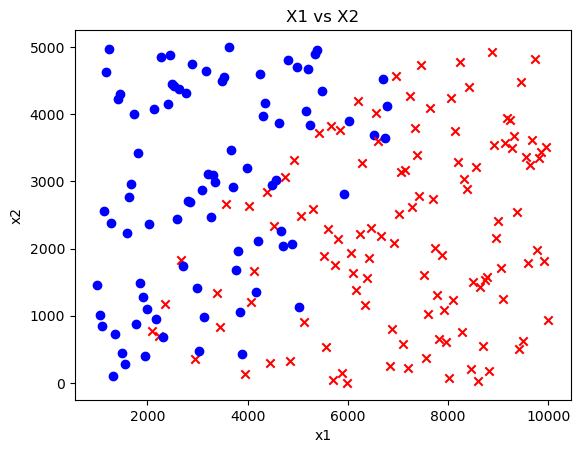

In [101]:
for i in range(len(y_bc)):
    marker = 'x' if y_bc[i] == 1 else 'o'
    c = 'r' if y_bc[i] == 1 else 'b'
    plt.scatter(x_bc[i, 0], x_bc[i, 1], marker=marker, c=c)
    
plt.title('X1 vs X2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## split and prepare the dataset
- We will generate the training, cross valdiation, and test sets. We will use the same 60/20/20 proportions. We will also scale the features

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
# Get 60% of the dataset as the training set. Put the reamining 40 in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into 2 : one hald for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the tranining set (input) is : {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

The shape of the tranining set (input) is : (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [105]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

## Evualte the error for classification models
- On regression models, We used the mean squared error to measure how well our model is doing. For classification, we can get a similar metric by getting the fraction of the data that the model has misclassified.
- For example, if our model made wrong predictions for 2 samples out of 5, then we will report an error of 40% or 0.4.

In [107]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a tresholld to the model output. If greater than 0.5, set to 1 else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Intialize counter for misclassification
misclassified = 0 

# Get the number of predictions
num_predictions = len(predictions)

for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        # Add on to the counter if the prediction is wrong
        misclassified += 1
        
# compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilites : {probabilities}")
print(f"Predictions with threshold=0.5:{predictions}")
print(f"Targer : {ground_truth}")
print(f"Fraction of misclassified data (for-loop) : {fraction_error}")
print(f"Fraction of misclassified data (with np.mean()) : {np.mean(predictions != ground_truth)}")

probabilites : [0.2 0.6 0.7 0.3 0.8]
Predictions with threshold=0.5:[0 1 1 0 1]
Targer : [1 1 1 1 1]
Fraction of misclassified data (for-loop) : 0.4
Fraction of misclassified data (with np.mean()) : 0.4


## Build and train the model
- We will use the same neural network architecture, so we can call the build_model() function to create new instances of these models.
- We will follow the recommended approach where we use a linear activation for the output layer (instead of sigmoid) then set from_logits=True when declaring the loss function of the model. We will use the binary crossentropy loss beacuase this is a binary classification problem.
- After training, we will use a sigmoid function to convert the model outputs into probailites. From there,we can set a threshold and get the fraction of misclassified examples from the trainig and cross validation sets.

In [110]:
# Initilize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = build_models()

# Loop over each model
for model in models_bc:
    # Setup the loss and optimizer
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),)
    
    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(x_bc_train_scaled, y_bc_train, epochs=200, verbose=0)
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassification examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)
    
    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)
    
# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training set classification Error: {nn_train_error[model_num]:.5f}, "+
        f"CV Set classification Error: {nn_cv_error[model_num]:.5f}"
    )

Training model_1...
Done!

2/2 [==============================] - 0s 2ms/step
Training model_2...
Done!

2/2 [==============================] - 0s 2ms/step
Training model_3...
Done!

2/2 [==============================] - 0s 2ms/step
Model 1: Training set classification Error: 0.06667, CV Set classification Error: 0.15000
Model 2: Training set classification Error: 0.05833, CV Set classification Error: 0.17500
Model 3: Training set classification Error: 0.07500, CV Set classification Error: 0.12500


- From the ouput, we can choose which one performed best. If there is a tie on the cross validation set error, then we can add another criteria to breatk it. For example, we can choose the one with a lower training error. A more common approach is to choose the smaller model because it saves computational resources.In our example, Model 1 is the smallest and Model 3 is the largest.
- Finally, we can compute the test error to report the model's generalization error.

In [114]:
# Select the model with the lowest error
model_num = 3

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat - np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model : {model_num}")
print(f"Training Set classification Error : {nn_train_error[model_num-1]:.4f}")
print(f"CV set classification Error : {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 2ms/step
Selected Model : 3
Training Set classification Error : 0.0750
CV set classification Error : 0.1250
Test Set Classification Error: 0.5500
